In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils

import matplotlib.pyplot as plt
import numpy as np
import copy

import torchvision
import torchvision.datasets
import torchvision.transforms

from torch.utils.data import DataLoader
from torch.utils.data import SubsetRandomSampler

from torchvision.utils import make_grid

In [2]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((100, 100)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset = torchvision.datasets.ImageFolder(
    root = "C:\\Users\\ASUS ROG\\Desktop\\NICO\\Machine Learning\\FLOWERS\\flower_photos",
    transform = transform
)

transform1 = torchvision.transforms.Compose([
    torchvision.transforms.Resize((100, 100)),
    torchvision.transforms.ColorJitter(brightness= 100.0, contrast=30.0, saturation=20.0, hue=0.2),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform2 = torchvision.transforms.Compose([
    torchvision.transforms.Resize((100, 100)),
    torchvision.transforms.GaussianBlur(kernel_size=3, sigma=(0.5, 3)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

transform3 = torchvision.transforms.Compose([
    torchvision.transforms.Resize((100, 100)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    torchvision.transforms.RandomRotation(degrees=70),
    torchvision.transforms.RandomVerticalFlip(0.5)
])

In [3]:
len(dataset)

3670

In [4]:
image, label = dataset[0]
image.shape, label, dataset.classes

(torch.Size([3, 100, 100]),
 0,
 ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'])

In [5]:
indices = list(range(len(dataset)))
len(indices)

3670

In [11]:
test_size = 0.1
val_size = 0.35

split_val = int(val_size * len(dataset))
split_test = int(test_size * len(dataset))

train, val_temp = indices[split_val:], indices[:split_val]
val, test = val_temp[split_test:], val_temp[:split_test]

len(train), len(val), len(test)

(2386, 917, 367)

In [12]:
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(
    dataset = dataset,
    lengths = (len(train), len(val), len(test))
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

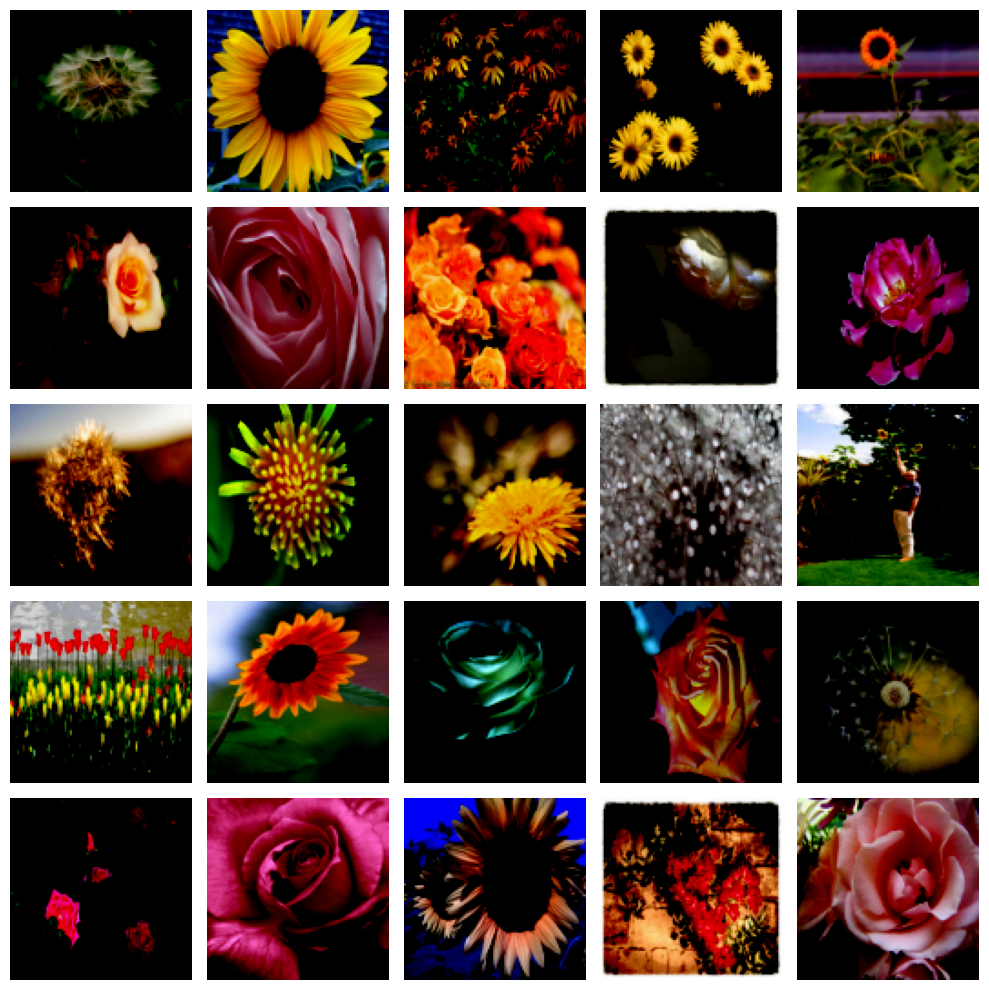

In [13]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

for i, item in enumerate(train_dataset):
    if i >= 5*5: break
    image, _ = item
    ax = axes[i//5, i%5]
    ax.imshow(image.permute(1, 2, 0))
    ax.axis("off")

plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

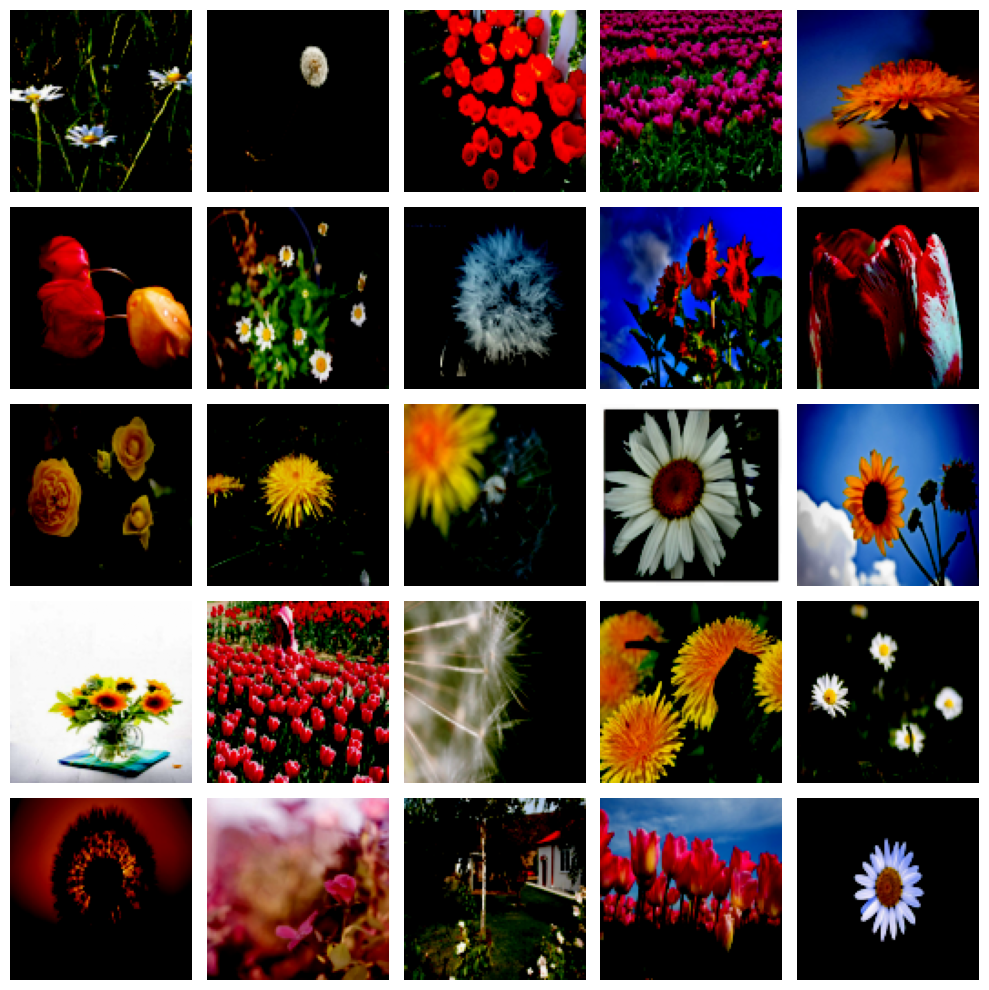

In [14]:
fig, axes = plt.subplots(5, 5, figsize=(10,10))

for i, item in enumerate(val_dataset):
    if i >= 5*5: break
    image, _ = item
    ax = axes[i//5, i%5]
    ax.imshow(image.permute(1, 2, 0))
    ax.axis("off")

plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

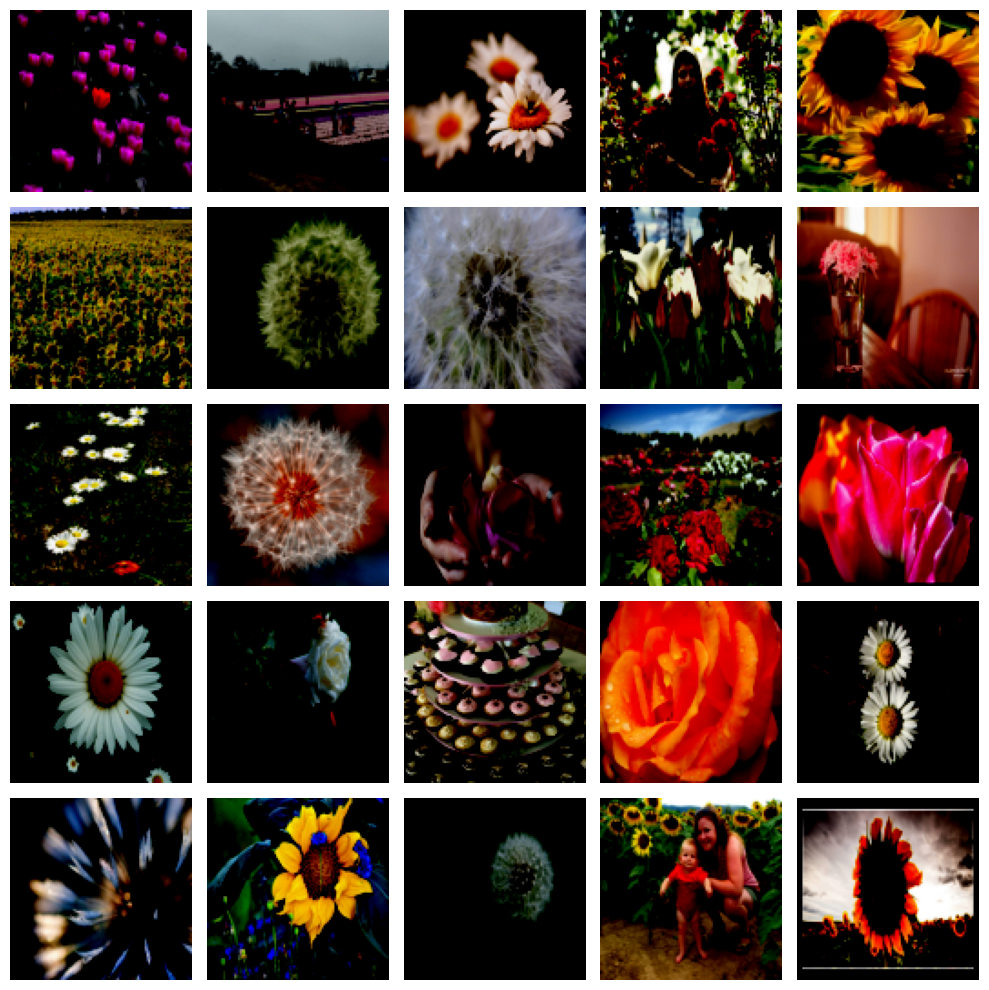

In [15]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

for i, item in enumerate(test_dataset):
    if i >= 5*5: break
    image, _ = item
    ax = axes[i//5, i%5]
    ax.imshow(image.permute(1, 2, 0))
    ax.axis("off")

plt.tight_layout()
plt.show()

In [16]:
train_dataset_clone1 = copy.deepcopy(train_dataset)
train_dataset_clone2 = copy.deepcopy(train_dataset)
train_dataset_clone3 = copy.deepcopy(train_dataset)

train_dataset_clone1.dataset.transform = transform1
train_dataset_clone2.dataset.transform = transform2
train_dataset_clone3.dataset.transform = transform3

In [17]:
train_dataset = torch.utils.data.ConcatDataset([
    train_dataset,
    train_dataset_clone1,
    train_dataset_clone2,
    train_dataset_clone3
])

len(train_dataset)

9544

In [19]:
def data_load(train_data, val_data, test_data, batch_size=128):
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

    return train_loader, val_loader, test_loader

In [20]:
data_loader = data_load(train_dataset, val_dataset, test_dataset)

In [21]:
len(data_loader[0]), len(data_loader[1]), len(data_loader[2])

(75, 8, 3)

In [49]:
%run -i model.py
%run -i train.py
torch.manual_seed(500)

In [35]:
def model_name(name, batch_size, lr, epoch):
    path = '{0}_bs_{1}_lr_{2}_epoch_{3}'.format(name, batch_size, lr, epoch)
    return path

In [50]:
batch_size = 64
lr = 0.001
epoch = 15

train_loader, val_loader, test_loader = data_load(train_dataset, val_dataset, test_dataset)

model = FLOWERS()
train_FLOWERS(model, train_loader, val_loader, batch_size=batch_size, lr=lr, epoch=epoch)

Training in cuda
Epoch 1: Train_Loss = 49.5733, Train_Error = 0.3896, Train_Acc = 61.0436% || Val_Loss = 23.8750, Val_Error = 0.2083, Val_Acc = 79.1712%
Time after Epoch 1: 41.414313s
Epoch 2: Train_Loss = 33.0667, Train_Error = 0.2598, Train_Acc = 74.0151% || Val_Loss = 22.0000, Val_Error = 0.1919, Val_Acc = 80.8070%
Time after Epoch 2: 83.566425s
Epoch 3: Train_Loss = 29.0533, Train_Error = 0.2283, Train_Acc = 77.1689% || Val_Loss = 22.0000, Val_Error = 0.1919, Val_Acc = 80.8070%
Time after Epoch 3: 128.966109s
Epoch 4: Train_Loss = 27.2667, Train_Error = 0.2143, Train_Acc = 78.5729% || Val_Loss = 22.0000, Val_Error = 0.1919, Val_Acc = 80.8070%
Time after Epoch 4: 175.040939s
Epoch 5: Train_Loss = 24.7867, Train_Error = 0.1948, Train_Acc = 80.5218% || Val_Loss = 21.5000, Val_Error = 0.1876, Val_Acc = 81.2432%
Time after Epoch 5: 221.235877s
Epoch 6: Train_Loss = 24.5733, Train_Error = 0.1931, Train_Acc = 80.6894% || Val_Loss = 21.2500, Val_Error = 0.1854, Val_Acc = 81.4613%
Time afte

KeyboardInterrupt: 

In [39]:
%run -i test.py

In [52]:
model_path = "FLOWERS_bs_64_lr_0.001_epoch_6"

train_loader, val_loader, test_loader = data_load(train_dataset, val_dataset, test_dataset)


device = torch.device('cuda' if torch.cuda.is_available else 'cpu')
model.load_state_dict(torch.load(model_path, map_location=device))
test_FLOWERS(model, test_loader)

Training in cuda
Test_Loss = 22.0000, Test_Error = 0.1798, Test_Acc = 82.0163%
